In [2]:
import seaborn as sns
from queries import*
from utilities import*


## Visualising cell graph regions 

In [3]:
def plot_graph_rectangular_region_per_pheno(cell_data, edges, x_min,x_max,y_min, y_max,region='region_1',title='all_slide'):
    
    cell_data_to_plot = cell_data[(cell_data.cell_x_position > x_min) & (cell_data.cell_x_position  <x_max)&(cell_data.cell_y_position > y_min) & (cell_data.cell_y_position<y_max)]
    stroma = cell_data_to_plot[cell_data_to_plot.phenotype=='stroma']
    tumor = cell_data_to_plot[cell_data_to_plot.phenotype=='tumor']
    T = cell_data_to_plot[cell_data_to_plot.phenotype=='T']
    B = cell_data_to_plot[cell_data_to_plot.phenotype=='B']
    dendtritic = cell_data_to_plot[cell_data_to_plot.phenotype=='dendtritic']
 
    
    node_stroma_x = stroma.cell_x_position.values
    nodes_stroma_y = stroma.cell_y_position.values

    node_tumor_x = tumor.cell_x_position.values
    nodes_tumor_y = tumor.cell_y_position.values
    
    node_T_x = T.cell_x_position.values
    nodes_T_y = T.cell_y_position.values

    node_B_x = B.cell_x_position.values
    nodes_B_y = B.cell_y_position.values

    node_den_x = dendtritic.cell_x_position.values
    nodes_den_y = dendtritic.cell_y_position.values
    

    cells_in_rectangle = cell_data_to_plot.cell_id.values
    points = []


   

    rectangle_df = pd.DataFrame({})
    rectangle_df['cell_id'] = cells_in_rectangle
    edges_in_rectangle = edges.merge(rectangle_df, left_on = 'cell_id_1', right_on='cell_id', how='inner')
    edges_in_rectangle = edges_in_rectangle.merge(rectangle_df, left_on = 'cell_id_2', right_on='cell_id', how='inner')
    edges_in_rectangle = edges_in_rectangle[edges_in_rectangle.isna().apply(lambda row: not(row.cell_id_x or row.cell_id_y), axis =1)]

    print('number edges : ',len(edges_in_rectangle))


    fig = plt.figure(figsize = (12,12))

    for idx, row in edges_in_rectangle.iterrows():
    

    
        cell_1 = row.cell_id_1
        cell_2 = row.cell_id_2
    
        cell_1_x = float(cell_data[cell_data.cell_id == cell_1].cell_x_position.values)
        cell_1_y = float(cell_data[cell_data.cell_id == cell_1].cell_y_position.values)
    
    
        cell_2_x = float(cell_data[cell_data.cell_id == cell_2].cell_x_position.values)
        cell_2_y = float(cell_data[cell_data.cell_id == cell_2].cell_y_position.values)
    
    
        x_values = [cell_1_x,cell_2_x]
        y_values = [cell_1_y,cell_2_y]
    
        plt.plot(x_values,y_values,'-',color = 'black',linewidth=0.7)
    
    plt.plot(node_stroma_x, nodes_stroma_y,'o', color='orange',label='Stroma', linewidth=0.7,markersize=5)
    plt.plot(node_tumor_x, nodes_tumor_y,'o', color='red',label='Tumor',linewidth=0.7,markersize=5)
    plt.plot(node_T_x, nodes_T_y,'o', color='blue',label='T', linewidth=0.7,markersize=5)
    plt.plot(node_B_x, nodes_B_y,'o', color='green',label='B',linewidth=0.7,markersize=5)
    plt.plot(node_den_x, nodes_den_y,'o', color='black',label='dendtritic',linewidth=0.7,markersize=5)    
    
    
    plt.legend()
        
    #plt.xlabel('cell x position')
    #plt.ylabel('cell y position')
    plt.legend()
    plt.title(title)
    plt.savefig(PLOT_PATH + region + title + '.png')  

In [4]:
def plot_graph_rectangular_region(cell_data, edges, x_min,x_max,y_min, y_max,region='region_1',title='all_slide'):
    
    cell_data_to_plot = cell_data[(cell_data.cell_x_position > x_min) & (cell_data.cell_x_position  <x_max)&(cell_data.cell_y_position > y_min) & (cell_data.cell_y_position<y_max)]
    stroma = cell_data_to_plot[cell_data_to_plot.tissue_category=='stroma']
    tumor = cell_data_to_plot[cell_data_to_plot.tissue_category=='tumor']

    node_stroma_x = stroma.cell_x_position.values
    nodes_stroma_y = stroma.cell_y_position.values

    node_tumor_x = tumor.cell_x_position.values
    nodes_tumor_y = tumor.cell_y_position.values


    cells_in_rectangle = cell_data_to_plot.cell_id.values
    points = []


   

    rectangle_df = pd.DataFrame({})
    rectangle_df['cell_id'] = cells_in_rectangle
    edges_in_rectangle = edges.merge(rectangle_df, left_on = 'cell_id_1', right_on='cell_id', how='inner')
    edges_in_rectangle = edges_in_rectangle.merge(rectangle_df, left_on = 'cell_id_2', right_on='cell_id', how='inner')
    edges_in_rectangle = edges_in_rectangle[edges_in_rectangle.isna().apply(lambda row: not(row.cell_id_x or row.cell_id_y), axis =1)]

    print('number edges : ',len(edges_in_rectangle))


    fig = plt.figure(figsize = (12,12))

    for idx, row in edges_in_rectangle.iterrows():
    

    
        cell_1 = row.cell_id_1
        cell_2 = row.cell_id_2
    
        cell_1_x = float(cell_data[cell_data.cell_id == cell_1].cell_x_position.values)
        cell_1_y = float(cell_data[cell_data.cell_id == cell_1].cell_y_position.values)
    
    
        cell_2_x = float(cell_data[cell_data.cell_id == cell_2].cell_x_position.values)
        cell_2_y = float(cell_data[cell_data.cell_id == cell_2].cell_y_position.values)
    
    
        x_values = [cell_1_x,cell_2_x]
        y_values = [cell_1_y,cell_2_y]
    
        plt.plot(x_values,y_values,'-',color = 'black',linewidth=0.7)
    
    plt.plot(node_stroma_x, nodes_stroma_y,'o', color='green',label='Stroma', linewidth=0.7,markersize=5)
    plt.plot(node_tumor_x, nodes_tumor_y,'o', color='red',label='Tumor',linewidth=0.7,markersize=5)
    plt.legend()
        
    #plt.xlabel('cell x position')
    #plt.ylabel('cell y position')
    plt.legend()
    plt.title(title)
    plt.savefig(PLOT_PATH + region + title + '.png')    
    

## inForm Advanced Image Analysis Software slides parts
we picked some regions from different slides where we have the inform stained image

In [5]:
file_1_name = 'DEEPMEL_1F1_Scan3_[7897,45585]_cell_seg_data.txt'
file_2_name = 'DEEPMEL_1F1_Scan3_[4408,45581]_cell_seg_data.txt'
file_3_name = 'DEEPMEL_1F1_Scan3_[7897,46278]_cell_seg_data.txt'
file_4_name = 'DEEPMEL_1J1_Scan3_[12337,40862]_cell_seg_data.txt'
file_5_name = 'DEEPMEL_1J2_Scan2_[7508,44689]_cell_seg_data.txt'
file_6_name = 'DEEPMEL_1C1_Scan2_[12582,41191]_cell_seg_data.txt'
file_7_name = 'DEEPMEL_1F1_Scan3_[9745,46971]_cell_seg_data.txt'

FILE = file_7_name
PATIENT_ID = '1F1'
part = pd.read_csv('./data/input/stainings/' + FILE, sep='\t')

In [6]:
part = part[['Cell ID','Phenotype','Cell X Position','Cell Y Position']]
part = part.rename(columns={'Cell ID':'cell_id', 'Phenotype':'phenotype', 'Cell X Position': 'cell_x_position', 'Cell Y Position': 'cell_y_position' })

In [7]:
INPUT_PATH = './data/input/DEEPMEL_' + PATIENT_ID + '/'
OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID +'/'
PLOT_PATH ='./plots/DEEPMEL_' + PATIENT_ID +'/'
INPUT_FILE = 'DEEPMEL_'+ PATIENT_ID +'_cell_seg_data.csv'
TABLE_NAME_BQ = 'DEEPMEL_'+ PATIENT_ID +'_cell_seg_data'
plt.rcParams['font.size'] = '12'

In [8]:
cell_data = pd.read_csv(INPUT_PATH  + INPUT_FILE)

In [9]:
cell_data['phenotype'] = cell_data['phenotype'].apply(lambda x: get_phenotype(x))
#part['phenotype'] = part['phenotype'].apply(lambda x: get_phenotype(x))

In [10]:
cell_data = cell_data[cell_data.tissue_category!='missing']

In [11]:
cell_data.phenotype.unique()

array(['MISSING', 'stroma', 'dendtritic', 'tumor', 'T', 'macrophages',
       'B', 'NK', 'DP1'], dtype=object)

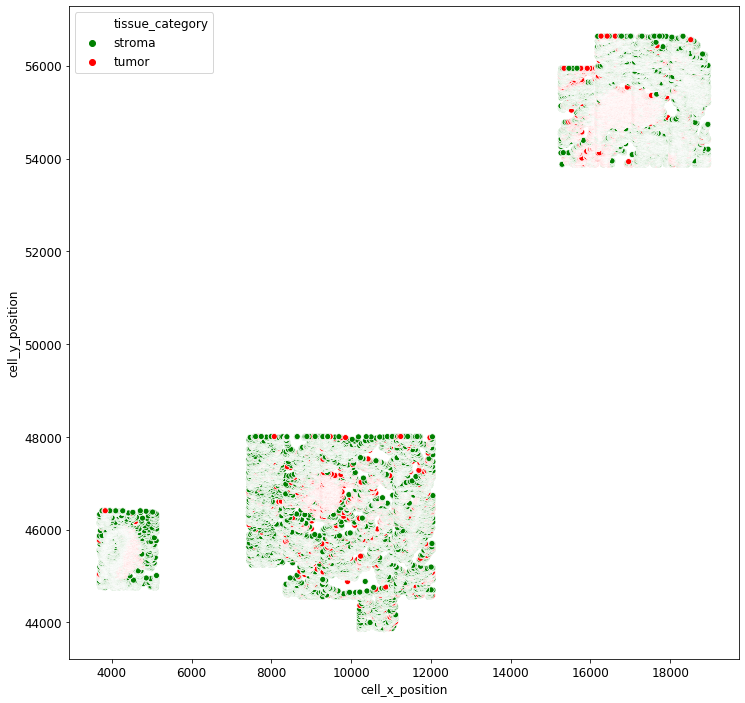

In [12]:
fig, ax = plt.subplots(figsize = (12,12))

color_tissue = {'stroma':'green','tumor':'red'}

sns.scatterplot(data = cell_data , x='cell_x_position', y= 'cell_y_position', hue = 'tissue_category', palette = color_tissue)
               
plt.savefig(PLOT_PATH + 'all_slide_'+PATIENT_ID+'.png')

## Region scatterplot

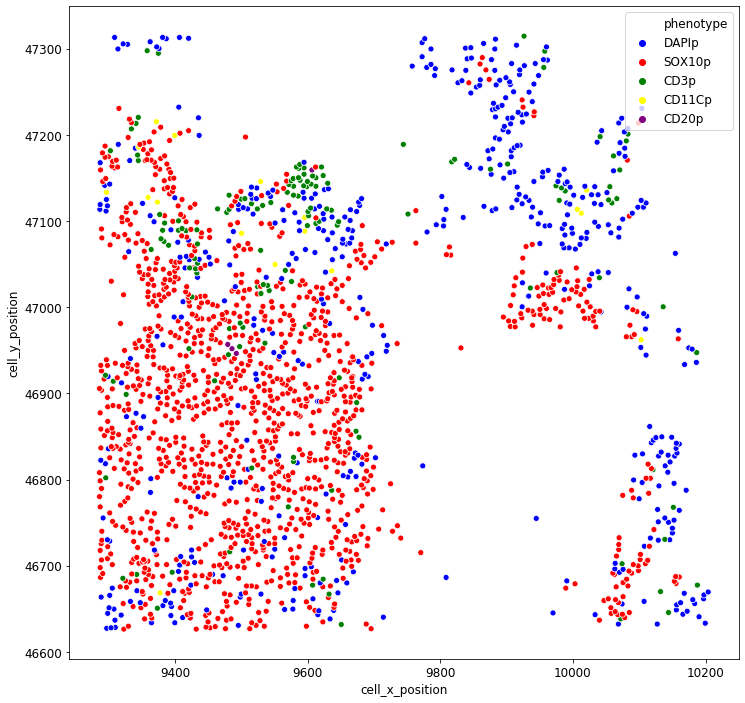

In [13]:
fig, ax = plt.subplots(figsize = (12,12))

color_tissue = {'DAPIp':'blue','SOX10p':'red', 'CD3p':'green' ,'CD11Cp':'yellow','CD20p':'purple'}
palette = color_tissue
sns.scatterplot(data = part , x='cell_x_position', y= 'cell_y_position', hue = 'phenotype', palette = color_tissue )
plt.savefig(PLOT_PATH + 'part_of_slide_per_pheno'+PATIENT_ID+'.png')

In [14]:
## Getting region edges and nodes 

In [15]:
edges_1 = pd.read_csv(OUTPUT_PATH + 'graph_edges.csv')

edges_1 = edges_1[edges_1.tissue_category_1 != 'missing']
edges_1 = edges_1[edges_1.tissue_category_2 != 'missing']
print(np.median(edges_1.distance.values))

13.191285001850126


In [16]:
x_min =part['cell_x_position'].values.min()
x_max = part['cell_x_position'].values.max()
y_min=part['cell_y_position'].values.min()
y_max = part['cell_y_position'].values.max()
region = 'region_1' + PATIENT_ID

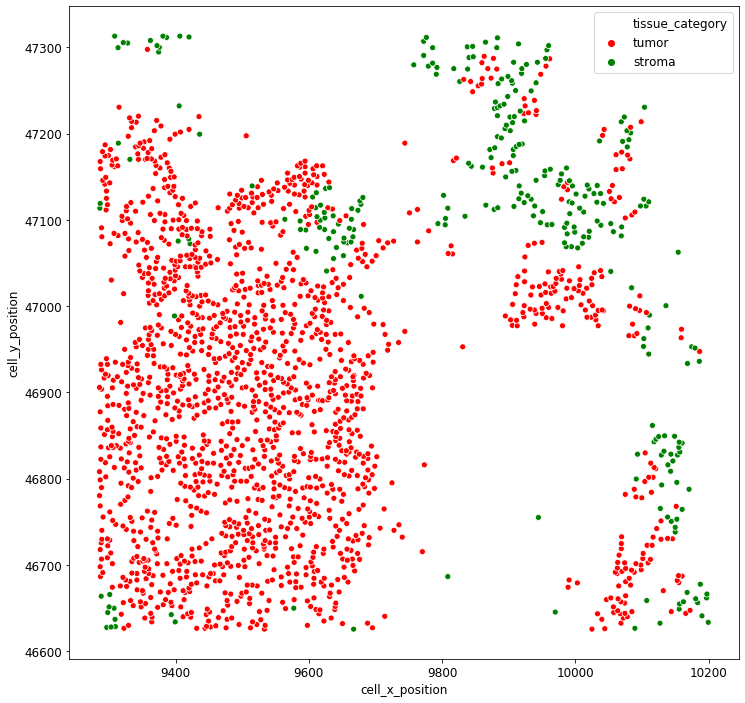

In [17]:
fig, ax = plt.subplots(figsize = (12,12))
color_tissue = {'stroma':'green','tumor':'red'}
slice_ =  cell_data[(cell_data.cell_x_position > x_min) & (cell_data.cell_x_position  <x_max)&(cell_data.cell_y_position > y_min) & (cell_data.cell_y_position<y_max)]
sns.scatterplot(data = slice_ , x='cell_x_position', y= 'cell_y_position', hue = 'tissue_category',palette = color_tissue )
plt.savefig(PLOT_PATH + 'part_of_slide_'+PATIENT_ID+'.png')


## Cell graph region plot per tissue 

number edges :  8220


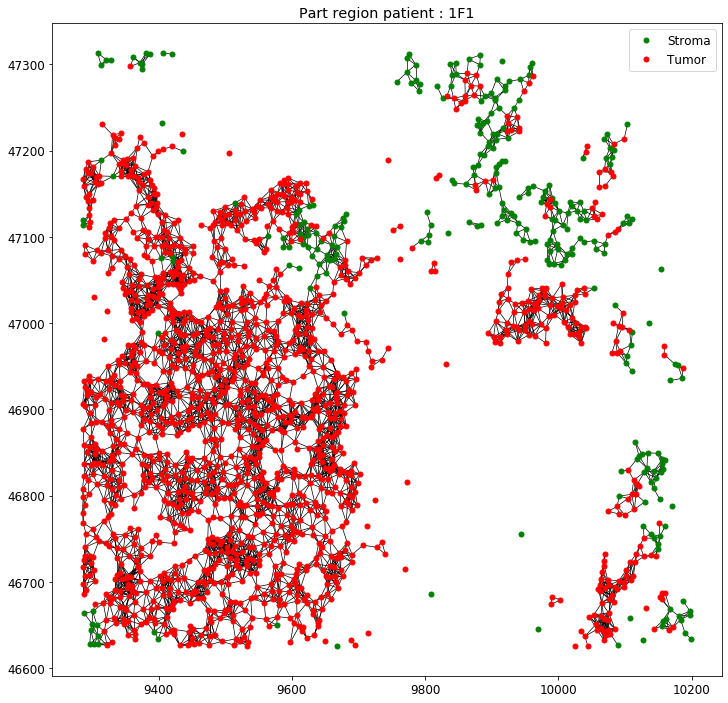

In [18]:
plot_graph_rectangular_region(cell_data, edges_1, x_min,x_max,y_min, y_max,region=region+'zoomeper_tissue',title='Part region patient : '+ PATIENT_ID)

### Zoomed region per tissue type

number edges :  644


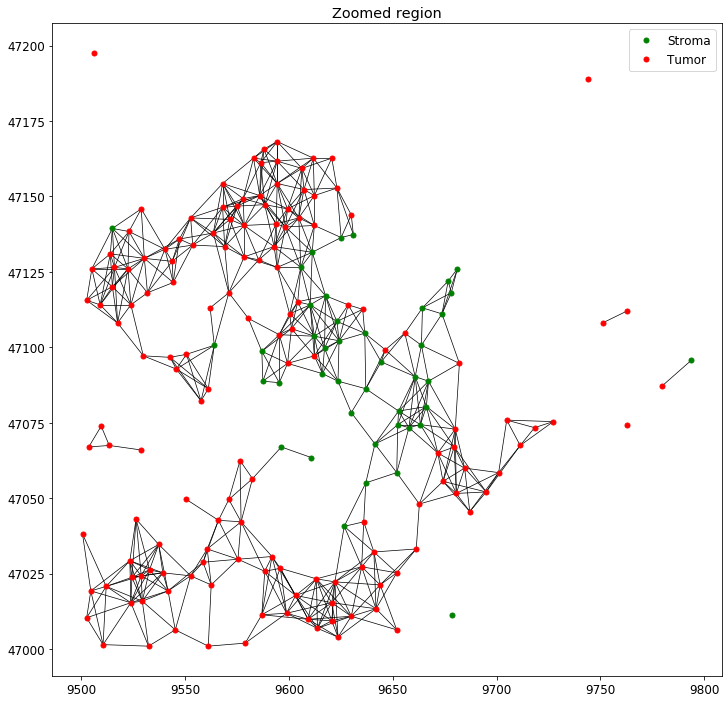

In [19]:
x_min =9500
x_max = 9800
y_min= 47000
y_max= 47200
region = 'region_12' + PATIENT_ID
plot_graph_rectangular_region(cell_data, edges_1, x_min,x_max,y_min, y_max,region=region+'zoomed_per_tissue',title='Zoomed region')

### Zoomed region per phenotype


number edges :  644


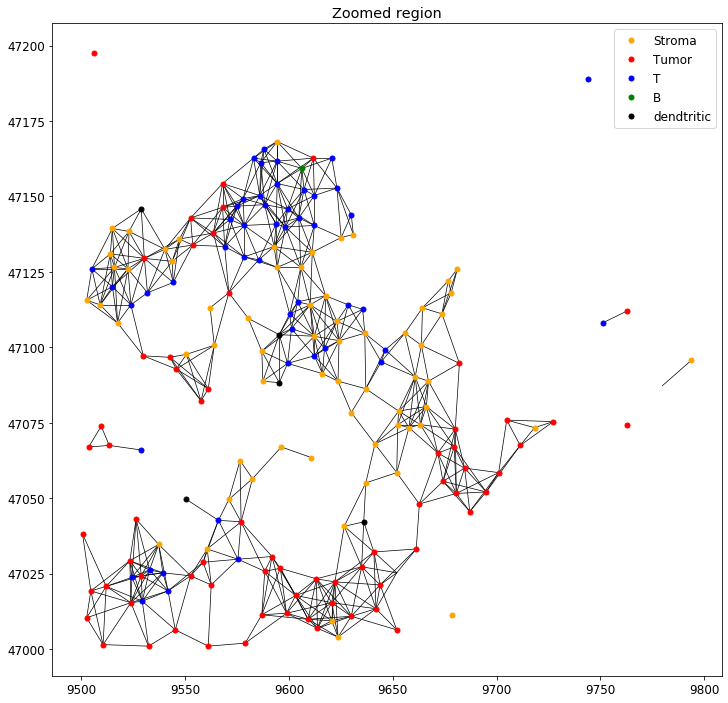

In [20]:
plot_graph_rectangular_region_per_pheno(cell_data, edges_1, x_min,x_max,y_min, y_max,region=region+'zoomed_per_phenotype',title='Zoomed region')

number edges :  202


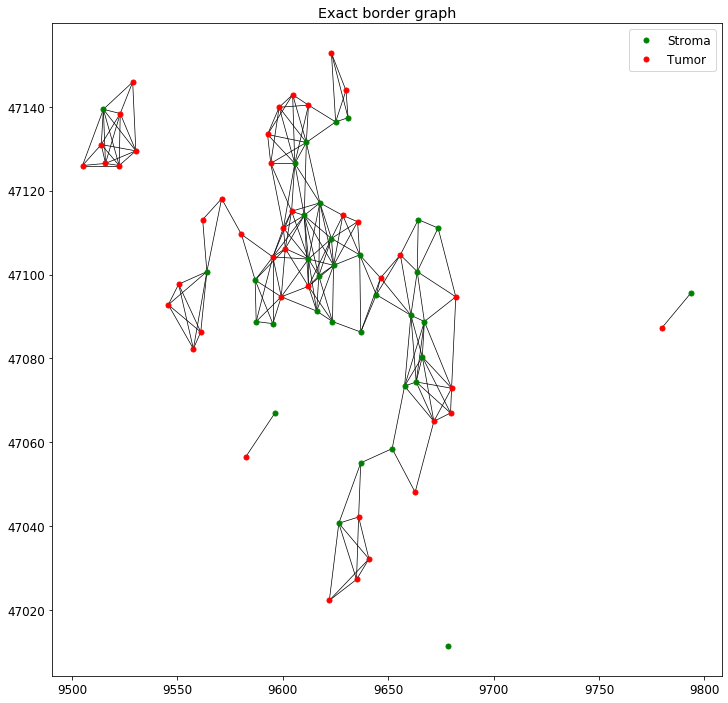

In [21]:
edges_1_border = edges_1[edges_1.tissue_category_1 != edges_1.tissue_category_2]
cells = get_cells_from_edges(edges_1_border)
border_cells_neighbors_df = pd.DataFrame({})
border_cells_neighbors_df['cell_id'] = cells
cell_data_with_border = cell_data[['cell_id','cell_x_position','cell_y_position','tissue_category','phenotype']].copy()
cell_data_with_border = cell_data_with_border.merge(border_cells_neighbors_df, on='cell_id', how='inner')

plot_graph_rectangular_region(cell_data_with_border, edges_1, x_min,x_max,y_min, y_max,region=region,title='Exact border graph')

number edges :  431


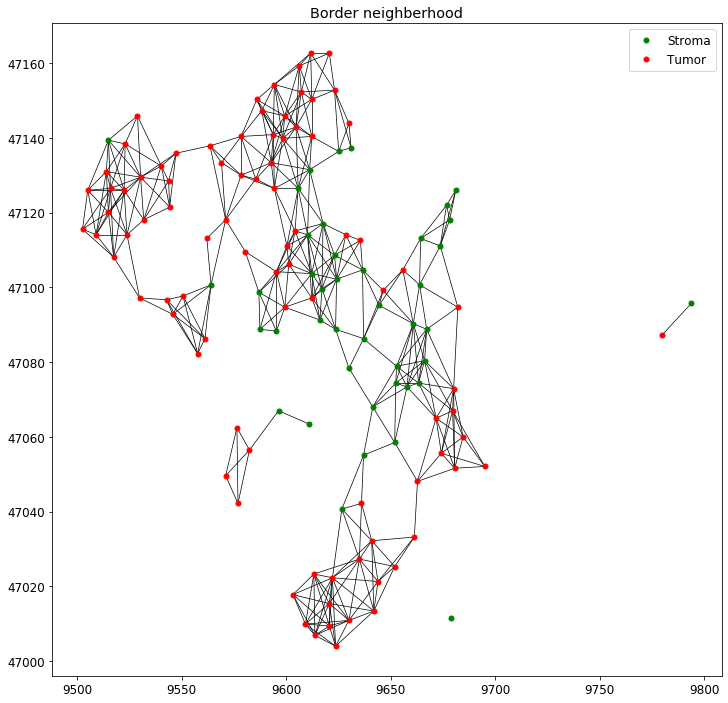

In [22]:
nodes = pd.read_csv(OUTPUT_PATH + 'nodes_with_border.csv')
nodes = nodes[nodes.tissue_category != 'missing']
nodes = nodes[(nodes.cell_x_position > x_min) & (nodes.cell_x_position  <x_max)&(nodes.cell_y_position > y_min) & (nodes.cell_y_position<y_max)]

nodes = nodes[nodes.on_border ==1]
edges_neighberhood = edges_1[edges_1.is_border == True]

plot_graph_rectangular_region(nodes, edges_neighberhood, x_min,x_max,y_min, y_max,region=region,title='Border neighberhood')